## Importações 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from extras.aux_funcs import *
from datetime import datetime
import matplotlib.dates as mdates

df_treino = pd.read_csv('./data/treino.csv',sep='|')
df_teste = pd.read_csv('./data/teste.csv',sep='|')

print(df_treino.shape)
df_treino.head(2)


(141628, 26)


,ssn,cc_num,first,last,gender,street,city,state,zip,lat,...,trans_num,trans_date,trans_time,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
0,154-42-8232,3520679981364629,Brandi,Miller,F,641 Shaw Trail,Monongahela,PA,NaN,40.19,...,70f3d30117916268b6c6050404cad687,2023-06-28,10:26:44,1.687959e+09,shopping_pos,1.31,0.0,fraud_Hickle Group,NaN,NaN
1,711-83-2839,213174225790506,Kari,Lee,F,876 Perry Ville Suite 721,Wentzville,MO,NaN,38.80,...,ba0f28da90534cf7ead525229d720387,2023-12-11,23:24:41,1.702348e+09,personal_care,2.64,0.0,fraud_Auer LLC,NaN,NaN


## Analise Exploratória de Dados

0         False
1         False
2         False
3         False
4         False
          ...  
141623     True
141624    False
141625     True
141626     True
141627     True
Name: is_weekend, Length: 141628, dtype: bool


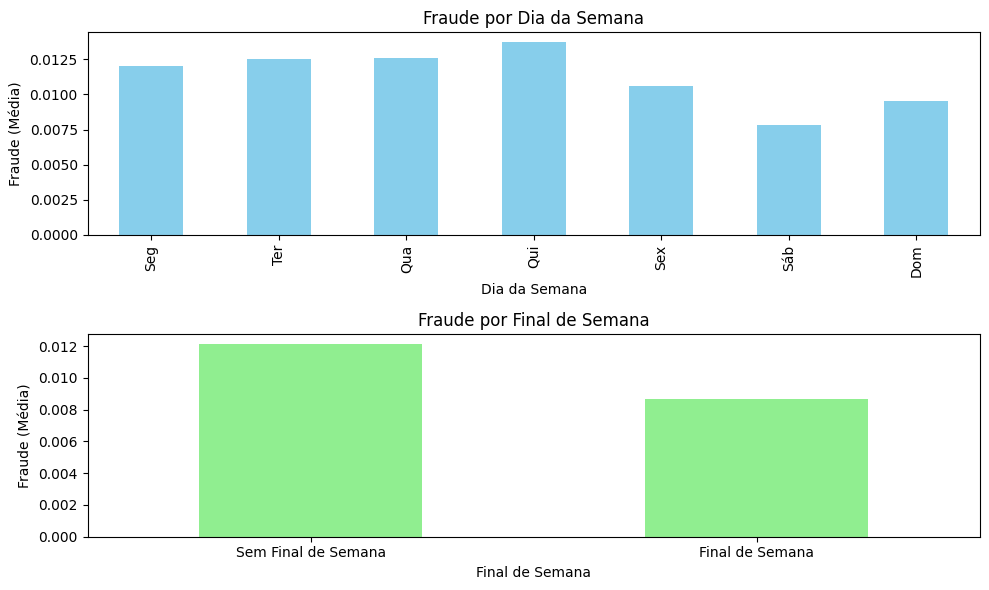

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


df_treino['trans_date'] = pd.to_datetime(df_treino['trans_date'])

df_treino['weekday'] = df_treino['trans_date'].dt.weekday
df_treino['is_weekend'] = df_treino['weekday'].isin([5, 6])
fraude_por_dia_da_semana = df_treino.groupby('weekday')['is_fraud'].mean()
fraude_por_final_de_semana = df_treino.groupby('is_weekend')['is_fraud'].mean()

plt.figure(figsize=(10, 6))

# Grafico por dia da semana
plt.subplot(2, 1, 1)
fraude_por_dia_da_semana.plot(kind='bar', color='skyblue')
plt.title('Fraude por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Fraude (Média)')
plt.xticks(range(7), ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom'])

# Grafico final de semana
plt.subplot(2, 1, 2)
fraude_por_final_de_semana.plot(kind='bar', color='lightgreen', rot=0)
plt.title('Fraude por Final de Semana')
plt.xlabel('Final de Semana')
plt.ylabel('Fraude (Média)')
plt.xticks([0, 1], ['Sem Final de Semana', 'Final de Semana'])

plt.tight_layout()
plt.show()
